# Case 2 Event Study - PEAD in Chinese A-share markets

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker

In [2]:
os.chdir('D:\Code Library\FIN3080\Project 3\case 2\daily stock return data')

## Step 0:

In [3]:
df_final = pd.DataFrame(columns=['Stkcd','date','stk_ret'], index = [0]) # 合并日个股数据
for csv_file in glob('*.csv'):
    df = pd.read_csv(csv_file)
    df = df.rename(columns = {'Trddt':'date', 'Dretwd':'stk_ret'})
    df_final = df_final.append(df, ignore_index = True)
df_final = df_final.dropna()
df = df_final
df = df.sort_values(['Stkcd','date'])
df

,Stkcd,date,stk_ret
1,2,2013-07-01,0.003046
2,2,2013-07-02,-0.016194
3,2,2013-07-03,-0.026749
4,2,2013-07-04,0.035941
5,2,2013-07-05,0.040816
...,...,...,...
4957014,605599,2021-12-27,0.014937
4957015,605599,2021-12-28,0.001549
4957016,605599,2021-12-29,0.000000
4957017,605599,2021-12-30,0.013921


## Step 1:

In [4]:
df1 = pd.read_csv(r'D:\Code Library\FIN3080\Project 3\case 2\EPS data\eps_data.csv')
df1 = df1.drop('Stknme', axis = 1)
df1 = df1.rename(columns = {'Reptyp':'quarter','Accper':'acc_dl','Eranb':'eps'})
df1 = df1[(df1.quarter == 2) | (df1.quarter == 4)] # 选择第二季度和第四季度数据
df1

,Stkcd,quarter,acc_dl,Annodt,eps
1,2,4,2012-12-31,2013-02-28,1.140
3,2,2,2013-06-30,2013-08-07,0.410
5,2,4,2013-12-31,2014-03-07,1.370
7,2,2,2014-06-30,2014-08-18,0.414
9,2,4,2014-12-31,2015-03-31,1.410
...,...,...,...,...,...
82225,605376,4,2020-12-31,2021-04-27,0.790
82226,605377,4,2020-12-31,2021-04-16,1.670
82228,605388,4,2020-12-31,2021-04-16,0.460
82230,605399,4,2020-12-31,2021-03-31,0.740


In [5]:
df2 = pd.read_csv(r'D:\Code Library\FIN3080\Project 3\case 2\market return data\mkt_ret.csv')
df2 = df2[df2.Markettype == 5].reset_index(drop = True) # 选取沪深主板市场回报率数据
df2 = df2.drop('Markettype', axis = 1)
df2 = df2.rename(columns = {'Cdretwdeq':'mkt_ret'})
df2

,Trddt,mkt_ret
0,2013-07-01,0.017770
1,2013-07-02,0.015206
2,2013-07-03,-0.003716
3,2013-07-04,0.011477
4,2013-07-05,-0.002140
...,...,...
1827,2020-12-25,0.010415
1828,2020-12-28,-0.007346
1829,2020-12-29,-0.003281
1830,2020-12-30,0.005061


## Step 2:

In [6]:
df1['year'] = pd.to_datetime(df1.acc_dl).dt.year # 添加一列会计截止日期的年数据
df1['sft_eps'] = df1.groupby('Stkcd').eps.shift(2) # 方便前后年份同一季度EPS作差
df1 = df1.dropna().reset_index(drop = True)
df1

,Stkcd,quarter,acc_dl,Annodt,eps,year,sft_eps
0,2,4,2013-12-31,2014-03-07,1.3700,2013,1.1400
1,2,2,2014-06-30,2014-08-18,0.4140,2014,0.4100
2,2,4,2014-12-31,2015-03-31,1.4100,2014,1.3700
3,2,2,2015-06-30,2015-08-17,0.4360,2015,0.4140
4,2,4,2015-12-31,2016-03-14,1.6000,2015,1.4100
...,...,...,...,...,...,...,...
35459,603999,4,2018-12-31,2019-04-26,0.0500,2018,0.1000
35460,603999,2,2019-06-30,2019-08-29,0.0320,2019,0.0082
35461,603999,4,2019-12-31,2020-04-25,0.0600,2019,0.0500
35462,603999,2,2020-06-30,2020-08-20,0.0323,2020,0.0320


## Step 3:

In [7]:
df1['UE'] = df1.eps - df1.sft_eps
df1['sigma'] = df1.groupby('Stkcd')['UE'].transform(lambda s: s.rolling(4).std()) # 求当前数据两年之间非预期盈余的标准差
df1 = df1.dropna()
df1

,Stkcd,quarter,acc_dl,Annodt,eps,year,sft_eps,UE,sigma
3,2,2,2015-06-30,2015-08-17,0.4360,2015,0.4140,0.0220,0.105033
4,2,4,2015-12-31,2016-03-14,1.6000,2015,1.4100,0.1900,0.085276
5,2,2,2016-06-30,2016-08-22,0.4832,2016,0.4360,0.0472,0.077528
6,2,4,2016-12-31,2017-03-27,1.9000,2016,1.6000,0.3000,0.129918
7,2,2,2017-06-30,2017-08-25,0.6500,2017,0.4832,0.1668,0.103676
...,...,...,...,...,...,...,...,...,...
35459,603999,4,2018-12-31,2019-04-26,0.0500,2018,0.1000,-0.0500,0.059979
35460,603999,2,2019-06-30,2019-08-29,0.0320,2019,0.0082,0.0238,0.065873
35461,603999,4,2019-12-31,2020-04-25,0.0600,2019,0.0500,0.0100,0.053783
35462,603999,2,2020-06-30,2020-08-20,0.0323,2020,0.0320,0.0003,0.032163


## Step 4:

In [8]:
def allocation(df): # 根据SUE进行分组的函数
    quan = df['SUE'].describe(percentiles = perc)
    quan = quan.iloc[4:13]
    df.loc[df.SUE <= quan[0],'allo'] = 0
    df.loc[(df.SUE > quan[0])&(df.SUE <= quan[1]),'allo'] = 1
    df.loc[(df.SUE > quan[1])&(df.SUE <= quan[2]),'allo'] = 2
    df.loc[(df.SUE > quan[2])&(df.SUE <= quan[3]),'allo'] = 3
    df.loc[(df.SUE > quan[3])&(df.SUE <= quan[4]),'allo'] = 4
    df.loc[(df.SUE > quan[4])&(df.SUE <= quan[5]),'allo'] = 5
    df.loc[(df.SUE > quan[5])&(df.SUE <= quan[6]),'allo'] = 6
    df.loc[(df.SUE > quan[6])&(df.SUE <= quan[7]),'allo'] = 7
    df.loc[(df.SUE > quan[7])&(df.SUE <= quan[8]),'allo'] = 8
    df.loc[df.SUE > quan[8],'allo'] = 9
    return df

In [9]:
df1['SUE'] = df1.UE / df1.sigma # 计算SUE的值
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
df1['allo'] = 1 # 添加新列
df1 = df1.groupby(['Stkcd']).apply(allocation) # 应用上个代码块定义的函数进行分组
df1 = df1.reset_index(drop = True)
df1

<ipython-input-9-ee5d1d988649>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SUE'] = df1.UE / df1.sigma
<ipython-input-9-ee5d1d988649>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['allo'] = 1


,Stkcd,quarter,acc_dl,Annodt,eps,year,sft_eps,UE,sigma,SUE,allo
0,2,2,2015-06-30,2015-08-17,0.4360,2015,0.4140,0.0220,0.105033,0.209457,0
1,2,4,2015-12-31,2016-03-14,1.6000,2015,1.4100,0.1900,0.085276,2.228059,6
2,2,2,2016-06-30,2016-08-22,0.4832,2016,0.4360,0.0472,0.077528,0.608814,2
3,2,4,2016-12-31,2017-03-27,1.9000,2016,1.6000,0.3000,0.129918,2.309158,8
4,2,2,2017-06-30,2017-08-25,0.6500,2017,0.4832,0.1668,0.103676,1.608860,5
...,...,...,...,...,...,...,...,...,...,...,...
27118,603999,4,2018-12-31,2019-04-26,0.0500,2018,0.1000,-0.0500,0.059979,-0.833626,0
27119,603999,2,2019-06-30,2019-08-29,0.0320,2019,0.0082,0.0238,0.065873,0.361302,7
27120,603999,4,2019-12-31,2020-04-25,0.0600,2019,0.0500,0.0100,0.053783,0.185934,5
27121,603999,2,2020-06-30,2020-08-20,0.0323,2020,0.0320,0.0003,0.032163,0.009328,3


In [10]:
df3 = df1[['Stkcd','quarter','acc_dl','Annodt','allo']]
df_qt2 = df3[df3.quarter == 2] # 选取每支股票每年前半年数据
df_qt2['acc_dl'] = pd.to_datetime(df_qt2.acc_dl).dt.year
df_qt2

<ipython-input-10-20c416edf9bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qt2['acc_dl'] = pd.to_datetime(df_qt2.acc_dl).dt.year


,Stkcd,quarter,acc_dl,Annodt,allo
0,2,2,2015,2015-08-17,0
2,2,2,2016,2016-08-22,2
4,2,2,2017,2017-08-25,5
6,2,2,2018,2018-08-21,3
8,2,2,2019,2019-08-21,4
...,...,...,...,...,...
27113,603998,2,2019,2019-08-27,4
27115,603998,2,2020,2020-08-29,2
27117,603999,2,2018,2018-08-22,1
27119,603999,2,2019,2019-08-29,7


In [11]:
df_qt4 = df3[df3.quarter == 4] # 选取每支股票每年后半年数据
df_qt4['acc_dl'] = pd.to_datetime(df_qt4.acc_dl).dt.year
df_qt4

<ipython-input-11-8b9244c4fe0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qt4['acc_dl'] = pd.to_datetime(df_qt4.acc_dl).dt.year


,Stkcd,quarter,acc_dl,Annodt,allo
1,2,4,2015,2016-03-14,6
3,2,4,2016,2017-03-27,8
5,2,4,2017,2018-03-27,9
7,2,4,2018,2019-03-26,9
9,2,4,2019,2020-03-18,7
...,...,...,...,...,...
27114,603998,4,2019,2020-04-30,1
27116,603998,4,2020,2021-04-29,0
27118,603999,4,2018,2019-04-26,0
27120,603999,4,2019,2020-04-25,5


In [12]:
df_qt2_fn = pd.merge(df, df_qt2, how = 'left', left_on = ['Stkcd','date'], right_on = ['Stkcd','Annodt']) # 合并日个股数据与公司年报数据
idx_lst = df_qt2_fn.index[df_qt2_fn.allo.isnull() == False].tolist() # 获取年报公布日的行索引
dret_qt2 = pd.DataFrame(columns=['Stkcd','acc_dl','quarter','t_index','cum_ab_ret'], index = [0]) # 生成新的空表格存储数据
df_qt2_fn

,Stkcd,date,stk_ret,quarter,acc_dl,Annodt,allo
0,2,2013-07-01,0.003046,NaN,NaN,NaN,NaN
1,2,2013-07-02,-0.016194,NaN,NaN,NaN,NaN
2,2,2013-07-03,-0.026749,NaN,NaN,NaN,NaN
3,2,2013-07-04,0.035941,NaN,NaN,NaN,NaN
4,2,2013-07-05,0.040816,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4957013,605599,2021-12-27,0.014937,NaN,NaN,NaN,NaN
4957014,605599,2021-12-28,0.001549,NaN,NaN,NaN,NaN
4957015,605599,2021-12-29,0.000000,NaN,NaN,NaN,NaN
4957016,605599,2021-12-30,0.013921,NaN,NaN,NaN,NaN


## Step 5, 6, 7:

In [13]:
for i in idx_lst:
    inter = df_qt2_fn.iloc[i - 120 : i + 121] # 对于公司财报发布日期前后120天的日回报率数据切片
    inter = pd.merge(inter, df2, how = 'left', left_on = 'date', right_on = 'Trddt') # 合并切片数据与市场数据
    inter['ab_ret'] = inter.stk_ret - inter.mkt_ret # 计算非预期收益率
    inter['t_index'] = range(-120,121) # 生成时间戳
    inter['cum_ab_ret'] = inter.ab_ret.cumsum() # 生成累计非预期收益率
    inter['acc_dl'] = int(inter.loc[inter.t_index == 0, 'acc_dl'].iloc[0])
    inter = inter[['Stkcd','acc_dl','quarter','t_index','cum_ab_ret']]
    inter = inter.fillna(method = 'bfill').fillna(method = 'ffill') # 将季度数据前后填充
    dret_qt2 = dret_qt2.append(inter, ignore_index = True) # 循环将切片数据加入总表
    
dret_qt2 = dret_qt2.dropna() # 去除第一行生成新表时的空数据
dret_qt2

,Stkcd,acc_dl,quarter,t_index,cum_ab_ret
1,2,2015,2.0,-120,-0.029362
2,2,2015,2.0,-119,-0.005963
3,2,2015,2.0,-118,-0.023977
4,2,2015,2.0,-117,-0.044402
5,2,2015,2.0,-116,-0.084909
...,...,...,...,...,...
2365411,603999,2020,2.0,116,-0.355178
2365412,603999,2020,2.0,117,-0.355178
2365413,603999,2020,2.0,118,-0.355178
2365414,603999,2020,2.0,119,-0.355178


In [14]:
result_qt2 = pd.merge(dret_qt2, df_qt2, how = 'left', on = ['Stkcd','acc_dl','quarter'])
result_qt2 = result_qt2.groupby(['allo','t_index']).cum_ab_ret.mean().reset_index() # 求同组2015-2020年的累计非预期收益率均值
result_qt2

,allo,t_index,cum_ab_ret
0,0.0,-120,-0.001879
1,0.0,-119,-0.002606
2,0.0,-118,-0.003274
3,0.0,-117,-0.003107
4,0.0,-116,-0.004577
...,...,...,...
2405,9.0,116,-0.028797
2406,9.0,117,-0.028783
2407,9.0,118,-0.029545
2408,9.0,119,-0.031065


In [15]:
df_qt4_fn = pd.merge(df, df_qt4, how = 'left', left_on = ['Stkcd','date'], right_on = ['Stkcd','Annodt']) # 对第四季度重复一遍算法
idx_lst = df_qt4_fn.index[df_qt4_fn.allo.isnull() == False].tolist()
dret_qt4 = pd.DataFrame(columns=['Stkcd','acc_dl','quarter','t_index','cum_ab_ret'], index = [0])
df_qt4_fn

,Stkcd,date,stk_ret,quarter,acc_dl,Annodt,allo
0,2,2013-07-01,0.003046,NaN,NaN,NaN,NaN
1,2,2013-07-02,-0.016194,NaN,NaN,NaN,NaN
2,2,2013-07-03,-0.026749,NaN,NaN,NaN,NaN
3,2,2013-07-04,0.035941,NaN,NaN,NaN,NaN
4,2,2013-07-05,0.040816,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4957013,605599,2021-12-27,0.014937,NaN,NaN,NaN,NaN
4957014,605599,2021-12-28,0.001549,NaN,NaN,NaN,NaN
4957015,605599,2021-12-29,0.000000,NaN,NaN,NaN,NaN
4957016,605599,2021-12-30,0.013921,NaN,NaN,NaN,NaN


In [16]:
for i in idx_lst: # 对第四季度重复一遍算法
    inter = df_qt4_fn.iloc[i - 120 : i + 121]
    inter = pd.merge(inter, df2, how = 'left', left_on = 'date', right_on = 'Trddt')
    inter['ab_ret'] = inter.stk_ret - inter.mkt_ret
    inter['t_index'] = range(-120,121)
    inter['cum_ab_ret'] = inter.ab_ret.cumsum()
    inter['acc_dl'] = int(inter.loc[inter.t_index == 0, 'acc_dl'].iloc[0])  
    inter = inter[['Stkcd','acc_dl','quarter','t_index','cum_ab_ret']]
    inter = inter.fillna(method = 'bfill').fillna(method = 'ffill')
    dret_qt4 = dret_qt4.append(inter, ignore_index = True)

dret_qt4 = dret_qt4.dropna()
dret_qt4

,Stkcd,acc_dl,quarter,t_index,cum_ab_ret
1,2,2016,4.0,-120,0.090153
2,2,2016,4.0,-119,0.036519
3,2,2016,4.0,-118,0.028281
4,2,2016,4.0,-117,0.039049
5,2,2016,4.0,-116,0.066301
...,...,...,...,...,...
2477717,603999,2020,4.0,116,-0.045995
2477718,603999,2020,4.0,117,-0.045995
2477719,603999,2020,4.0,118,-0.045995
2477720,603999,2020,4.0,119,-0.045995


In [17]:
result_qt4 = pd.merge(dret_qt4, df_qt4, how = 'left', on = ['Stkcd','acc_dl','quarter'])
result_qt4 = result_qt4.groupby(['allo','t_index']).cum_ab_ret.mean().reset_index()
result_qt4

,allo,t_index,cum_ab_ret
0,0.0,-120,-0.001220
1,0.0,-119,-0.001691
2,0.0,-118,-0.001926
3,0.0,-117,-0.003707
4,0.0,-116,-0.004756
...,...,...,...
2405,9.0,116,-0.015879
2406,9.0,117,-0.016001
2407,9.0,118,-0.016461
2408,9.0,119,-0.016940


In [18]:
result = result_qt2.append(result_qt4, ignore_index = True) # 将第二季度数据与第四季度数据合并
result = result.groupby(['allo','t_index']).cum_ab_ret.mean().reset_index() # 求平均值
result.loc[result.t_index == -120,'cum_ab_ret'] = 0 # 将-120天的回报率数据初始化为0
result

,allo,t_index,cum_ab_ret
0,0.0,-120,0.000000
1,0.0,-119,-0.002148
2,0.0,-118,-0.002600
3,0.0,-117,-0.003407
4,0.0,-116,-0.004667
...,...,...,...
2405,9.0,116,-0.022338
2406,9.0,117,-0.022392
2407,9.0,118,-0.023003
2408,9.0,119,-0.024003


## Step 8:

In [19]:
x_cor = result.t_index.unique() # 前后120天时间索引
x_cor

array([-120, -119, -118, -117, -116, -115, -114, -113, -112, -111, -110,
       -109, -108, -107, -106, -105, -104, -103, -102, -101, -100,  -99,
        -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,  -89,  -88,
        -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,
        -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,
        -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,
        -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,
        -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,
        -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,
        -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,
        -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,   -1,    0,
          1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   

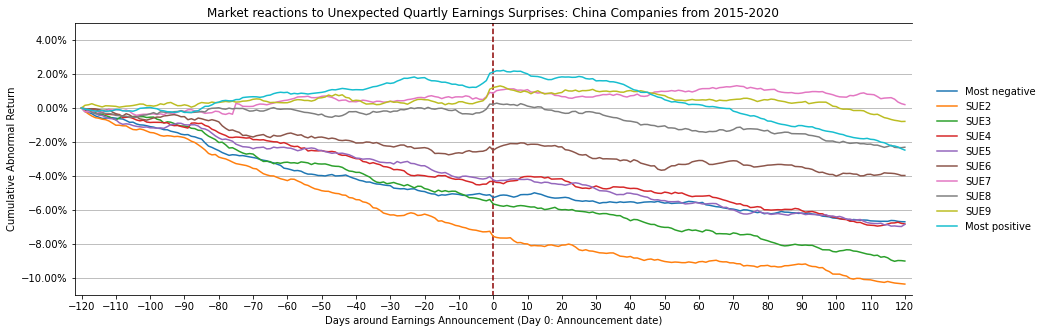

In [20]:
plt.figure(figsize = [15,5]) # 图表制作
plt.plot(x_cor, result.loc[result.allo == 0,'cum_ab_ret'], label = 'Most negative')
plt.plot(x_cor, result.loc[result.allo == 1,'cum_ab_ret'], label = 'SUE2')
plt.plot(x_cor, result.loc[result.allo == 2,'cum_ab_ret'], label = 'SUE3')
plt.plot(x_cor, result.loc[result.allo == 3,'cum_ab_ret'], label = 'SUE4')
plt.plot(x_cor, result.loc[result.allo == 4,'cum_ab_ret'], label = 'SUE5')
plt.plot(x_cor, result.loc[result.allo == 5,'cum_ab_ret'], label = 'SUE6')
plt.plot(x_cor, result.loc[result.allo == 6,'cum_ab_ret'], label = 'SUE7')
plt.plot(x_cor, result.loc[result.allo == 7,'cum_ab_ret'], label = 'SUE8')
plt.plot(x_cor, result.loc[result.allo == 8,'cum_ab_ret'], label = 'SUE9')
plt.plot(x_cor, result.loc[result.allo == 9,'cum_ab_ret'], label = 'Most positive')
plt.xlabel('Days around Earnings Announcement (Day 0: Announcement date)')
plt.ylabel('Cumulative Abnormal Return')
plt.title('Market reactions to Unexpected Quartly Earnings Surprises: China Companies from 2015-2020')
x_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1, decimals = 2))
ax.spines['right'].set_visible(False)
ax.vlines([0], -1, 1, linestyles='dashed', colors='darkred')
plt.xlim((-122,122))
plt.ylim((-0.11,0.05))
plt.legend(loc = 2, bbox_to_anchor = (1.02, 0.8), frameon = False)
plt.grid(axis = 'y')
plt.show()